In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle

In [2]:
pth = "/SSD/Pratik/Gait_Data/Casia_data_preprocessed/GaitDatasetB-silh_PerfectlyAlingedFullPossibleCyclesImages/"
with open("indices_ntm_1_10.txt", "rb") as fp:
    new_id = pickle.load(fp)
ind = new_id

In [3]:
#gait cycle image printing --helper function
cycls=0

kp1 = np.zeros((200,200))

kp2 = np.zeros((200,200))

kp3 = np.zeros((200,200))

kp4 = np.zeros((200,200))


kp5 = np.zeros((200,200))

kp6 = np.zeros((200,200))

def print_img(path,app,nm):
    files = glob.glob(path+"*.png")
    files.sort()
    
    for j in range(len(ind[int(app)][nm-1])-2):
        if j is None:
            continue
        
        fp=ind[int(app)][nm-1][j+1]-ind[int(app)][nm-1][j]+1
        sp=ind[int(app)][nm-1][j+2]-ind[int(app)][nm-1][j+1]+1
        
        p1=fp//3
        
        p4=sp//3
        
        avg1=np.zeros((200,200))
        avg2=np.zeros((200,200))
        avg3=np.zeros((200,200))
        avg4=np.zeros((200,200))
        avg5=np.zeros((200,200))
        avg6=np.zeros((200,200))
        
        for i in range(ind[int(app)][nm-1][j],ind[int(app)][nm-1][j]+p1):
            img = cv2.imread(files[i],0)
            avg1+=img
            
        for i in range(ind[int(app)][nm-1][j]+p1,ind[int(app)][nm-1][j]+2*p1):
            img = cv2.imread(files[i],0)
            avg2+=img
            
        for i in range(ind[int(app)][nm-1][j]+2*p1,ind[int(app)][nm-1][j+1]):
            img = cv2.imread(files[i],0)
            avg3+=img
            
        for i in range(ind[int(app)][nm-1][j+1],ind[int(app)][nm-1][j+1]+p4):
            img = cv2.imread(files[i],0)
            avg4+=img
            
        for i in range(ind[int(app)][nm-1][j+1]+p4,ind[int(app)][nm-1][j+1]+2*p4):
            img = cv2.imread(files[i],0)
            avg5+=img
            
        for i in range(ind[int(app)][nm-1][j+1]+2*p4,ind[int(app)][nm-1][j+2]):
            img = cv2.imread(files[i],0)
            avg6+=img
            
        avg1/=p1
        avg2/=p1
        avg3/=(fp-2*p1)
        avg4/=p4
        avg5/=p4
        avg6/=(sp-2*p4)
        
        f, ax = plt.subplots(1,6,figsize=(16,16))
        
        global kp1,kp2,kp3,kp4,kp5,kp6,cycls
        
        kp1+=avg1
        kp2+=avg2
        kp3+=avg3
        kp4+=avg4
        kp5+=avg5
        kp6+=avg6
        
        cycls+=1
        
        
        ax[0].imshow(avg1)
#         plt.show()
        
        ax[1].imshow(avg2)
#         plt.show()
        
        ax[2].imshow(avg3)
#         plt.show()
        
        ax[3].imshow(avg4)
#         plt.show()
        
        ax[4].imshow(avg5)
#         plt.show()
        
        ax[5].imshow(avg6)
        plt.show()
        print(p1,p1,fp-2*p1,p4,p4,sp-2*p4)
        print('Gait cycle complete')
        print('%%'*10)
        

In [ ]:
#gait cycle image printing
for i in range(1,11):
    if i<10:
        app = "00"+str(i)
    elif i<100:
        app = "0"+str(i)
    else :
        app = str(i)
    for j in range(1,7):
        path = pth+app+"/nm-0"+str(j)+"/"
        print(f"id - {app} nm-{j}")
        print_img(path,app,j)
    print("*"*20)

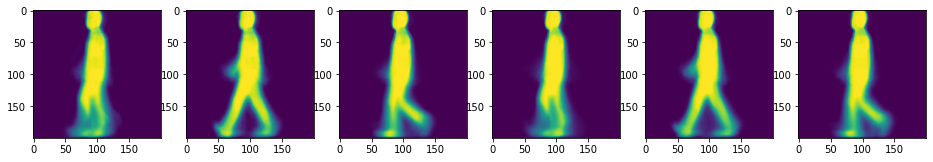

In [6]:

kp1/=cycls
kp2/=cycls
kp3/=cycls
kp4/=cycls
kp5/=cycls
kp6/=cycls


f, ax = plt.subplots(1,6,figsize=(16,16))

ax[0].imshow(kp1)
#         plt.show()

ax[1].imshow(kp2)
#         plt.show()

ax[2].imshow(kp3)
#         plt.show()

ax[3].imshow(kp4)
#         plt.show()

ax[4].imshow(kp5)
#         plt.show()

ax[5].imshow(kp6)
plt.show()